# Data Wrangling Project (we rate dogs)
#### Mahmoud Khayrallah
-----------------------
### Introduction

This project is about collecting data from 3 sources , asses them and clean them , then analyze the data.  
The data is about a twitter account that rates dogs on twitter.  

### Importing libraries

In [16]:
### importing the libraries which will be used through the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
#show the whole cell
pd.set_option('display.max_colwidth', -1)

### data gathering 

in this section we will collect data from 3 different places to analyze dogs ratings data 

In [2]:
# loading the archive data into local_df and showing the head
local_df = pd.read_csv('twitter-archive-enhanced.csv')
local_df.head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [3]:
#loading the pics neural network data using requests into image_df
#url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#getting the file and saving it
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as f :
    f.write(response.content)
    f.close()

In [3]:
#load it into image_df dataframe and showing the header
image_df = pd.read_csv('image_predictions.tsv', sep = '\t')
image_df.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [ ]:
#downloading tweets json to tweet_json.txt
#note that I faced too many problems running this chunk due to my bad connection 
#so I put it here and then used the ready file in the next chunk
with open('keys.txt', 'r') as f : ## a file I saved the keys in as a json object(not included in the submission)
    keys = json.load(f)
    f.close()
auth = tweepy.AppAuthHandler(keys['key'], keys['secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = local_df['tweet_id'].values
with open('tweet_json.txt', 'w') as outfile :
    for tweet_id in tweet_ids:
        try :
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except :
            print(tweet_id)
            pass
    outfile.close()

In [4]:
#load retweets and likes
with open('tweet_json.txt', 'r') as f :
    elements = [] #list of dictionaries to transform later to a dataframe
    for line in f :
        observation = json.loads(line)
        element = {} #temporary element to save the data in the for loop
        element['tweet_id'] = observation['id']
        element['rt_count'] = observation['retweet_count']
        element['fav_count'] = observation['favorite_count']
        elements.append(element)
    f.close()
    #create the data frame and show its info
    json_df = pd.DataFrame(elements)
    json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
fav_count    2354 non-null int64
rt_count     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Assessing our data visually

In [5]:
#local dataframe
local_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,None,None,None,None
1876,675111688094527488,NaN,NaN,2015-12-11 00:35:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He thought what was insid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675111688...,8,10,Oliver,None,None,None,None
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,None,None,None,None,None
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None
1651,683498322573824003,NaN,NaN,2016-01-03 04:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,None,None,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
1567,687826841265172480,NaN,NaN,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,None,None,None
1258,710283270106132480,NaN,NaN,2016-03-17 01:55:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710283270...,11,10,Gunner,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None


#### issues :
<ul>
    <li>source variable contains the whole link html not only the source (accuracy)</li>
    <li>there are some retweets that need to be deleted(validity)</li>
    <li>the "None" word needs to be replaced by 0 in order not to affect the visualizations and analysis(consistency)</li>
    <li>the expanded url has some missing data(completeness)</li>
    <li>the last four columns represent one variable, they are values not variables(tidiness)</li>
</ul>

In [8]:
#image dataframe
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1662,811985624773361665,https://pbs.twimg.com/media/C0TAnZIUAAAADKs.jpg,1,Staffordshire_bullterrier,0.610573,True,French_bulldog,0.159935,True,doormat,0.058672,False
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True


#### issues :
<ul>
    <li>p1_dog, p2_dog, p3_dog all represent 1 variable that can be named "p_dog" - is this a dog ? -(tidiness)</li>
    <li>p1, p2, p3 contains only one variable which is breed(if the pic contains a dog ofc)</li>
    <li>pics without dogs should be excluded (for better analysis)</li>
</ul>

In [11]:
#API dataframe
#move id to first column
cols = ['tweet_id', 'rt_count', 'fav_count']
json_df = json_df[cols]
json_df.sample(10)

,tweet_id,rt_count,fav_count
259,842892208864923648,56625,0
516,810896069567610880,2090,10093
278,839990271299457024,2597,14640
478,815745968457060357,4797,0
1402,699370870310113280,497,2053
1561,688179443353796608,669,2328
621,796080075804475393,2703,9469
1143,727175381690781696,1540,4209
1011,747219827526344708,1791,5792
103,872261713294495745,6649,35085


the api collected data looks clean visually

### Assessing data programatically

#### local dataset

In [12]:
# show info about the local_df fataframe
local_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

as mentioned before there are retweets needs to be deleted and there are missing values in expanded url  
**new issue :** timestamp is a string not a date (consistency)

In [15]:
#summary of numeric variables local_df
local_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### issues :
<ul>
    <li>not all denominators are equal to 10(accuracy)</li>
    <li>there are numerators with very large rating(accuracy)</li>
</ul>

In [21]:
#count of ratings with a denominator not equal to 10
local_df[local_df['rating_denominator'] != 10].shape[0]

23

In [27]:
#show tweets with denominator != 10 to study them
local_df[local_df['rating_denominator'] != 10][['tweet_id', 'retweeted_status_id', 'text']]

,tweet_id,retweeted_status_id,text
313,835246439529840640,NaN,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,832088576586297345,NaN,@docmisterio account started on 11/15/15
433,820690176645140481,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,775096608509886464,7.403732e+17,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,758467244762497024,NaN,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,NaN,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,NaN,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,NaN,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,NaN,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


**contains dates:** (740373189193256964, 14), (722974582966214656, 13)  
**retweets :** 775096608509886464	  
**bunch of dogs:** 820690176645140481, 758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 684225744407494656, 684222868335505415, 677716515794329600, 675853064436391936  
**impossible to get :** 832088576586297345, 810984652412424192, 686035780142297088, 682808988178739200  
**wrong parsing :** (835246439529840640, 13), (716439118184652801, 11), (682962037429899265, 10), (666287406224695296, 9)

#### issues :
<ul>
    <li>"impossible to get" tweets should be removed from the dataset (completeness)</li>
    <li>"wrong parsing" and "contains dates" should be modified (accuracy)</li>
</ul>

**note :** the retweets will be deleted later and all ratings will be normalized to a new scale for analysis so we don't need to edit the "bunch of dogs" ratings  
**tidiness issue :** numenator and denominator both represents one variable (rating)

In [24]:
#outliers in numinators
local_df.query('rating_numerator / rating_denominator > 2')[['tweet_id', 'text']]

,tweet_id,text
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,838150277551247360,@markhoppus 182/10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


**wrong parsing :** (786709082849828864, 10), (778027034220126208, 11), (680494726643068929, 11)  
**previously mentioned :** 835246439529840640, 810984652412424192  
**overrated (not good for analytical models):** 855862651834028034, 855860136149123072, 838150277551247360, 749981277374128128, 670842764863651840  
**retweets :** 832215909146226688	  

#### issues :

<ul>
    <li>remove the "overrated" group(accuracy)</li>
    <li>modify the "wrong parsing" group (accuracy)</li>
</ul>

**note :** looks like fractions aren't well parsed here so let's have a look

In [31]:
#ratings with fractions
local_df[local_df.text.str.contains('[0-9]\.[0-9]')][['tweet_id', 'text', 'rating_numerator']]

,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
259,843235543001513987,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,13
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1018,746818907684614144,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,13
1294,707995814724026368,This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,12
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26
1768,678389028614488064,This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,11


**previously mentioned :** 832215909146226688, 786709082849828864, 778027034220126208, 680494726643068929  
**wrong parsing :** (883482846933004288, 14), (681340665377193984, 10)

> modify the wrong parsed tweets to a rounded value

In [33]:
#repeated tweets
local_df.tweet_id.nunique()

2356

> consistency issue : edit all names to be something like "Sam"

#### image dataset

In [35]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
#repeated observations
image_df.tweet_id.nunique()

2075

In [39]:
#p > 1
image_df.query('p1_conf > 1 | p2_conf > 1 |p3_conf > 1')[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf


> nothing to add here , same goes with the api collected data

In [38]:
#repeated observations in parsed tweets
json_df.tweet_id.nunique()

2354

### all issues : 
#### quality : 
<ul>
    <li>source variable contains the whole link html not only the source (accuracy)</li>
    <li>there are some retweets that need to be deleted(accuracy)</li>
    <li>the "None" word needs to be replaced by 0 in the four types of the dogs variables in order not to affect the visualizations and analysis(consistency)</li>
    <li>the expanded url has some missing data(completeness)</li>
    <li>timestamp is a string not a date (consistency)</li>
    <li>"impossible to get" tweets should be removed from the dataset (completeness)</li>
    <li>wrongly parsed tweets and tweets contains dates and fractions should be modified (accuracy)</li>
    <li>overrating tweets should be deleted for accurate analysis(accuracy)</li>
    <li>modify dog names to have the first letter only capitalized (consistency)</li>
</ul>

> all quality issues are in the local_df dataframe 

> the retweets issue can be classified as tidiness issue since our table unit is tweets not retweets, but in this problem after merging we will study dogs ratings not the tweets itself so retweets are considered repeated (invalid) values

#### tidiness :
<ul>
    <li>the dog type four columns(doggo, floofer, .....) represent one categorical variable, they are values not variables(local_df)</li>
    <li>numerator and donominator both represent the rating variable</li>
    <li>p1_dog, p2_dog, p3_dog all represent 1 variable that can be named "p_dog" - is this a dog ? -(image_df)</li>
    <li>p1, p2, p3 contains only one variable which is breed(if the pic contains a dog ofc)(image_df)</li>
    <li>pics without dogs should be excluded (for better analysis)(image_df)</li>
    <li>rows are not equal in the three tables</li>
    <li>the three tables represent dogs, they should be merged</li>
</ul>

# Data Cleaning
### define 

> the steps here will be done in the code chunks below, each step will have 2 chunks with its number in a comment (one for coding and one for testing)

<ol>
    <li>copy the three dataframes to local_df_copy, image_df_copy, json_df_copy</li>
    <li>extract the real source source variable in local_df_copy</li>
    <li>find missing expanded urls using tweet id and expandurl api(not needed in the analysis step)</li>
    <li>delete retweets in local_df_copy</li>
    <li>delete overrating tweets and tweets with no possible logical rating in local_df_copy</li>
    <li>extract the datetime from the time stamp in local_df</li>
    <li>modify wrong ratings in local_df_copy</li>
    <li>capitalize the first letter of the names only in local_df_copy</li>
    <li>convert doggo, floofer, pupper, puppo variables to boolean in local_df_copy</li>
    <li>construct a column "type" in local_df_copy(excluded from the process)</li>
    <li>construct a column "rating" in local_df_copy equals num/den * 10</li>
    <li>construct a column "p_dog" in image_df_copy</li>
    <li>delete rows with no dog pics in image_df_copy</li>
    <li>construct a column "breed" in image_df_copy</li>
    <li>merge three tables in a df master_df</li>
</ol>

> I began with completeness issues and after that I should look at consistency but the order is a little different since there are steps depending on other steps.  
**example** : rating column depends on modifying ratings

### code & test

In [6]:
#1 , 2
#copy data
local_df_copy = local_df.copy()
image_df_copy = image_df.copy()
json_df_copy = json_df.copy()
#extract the real source source variable in local_df_copy
local_df_copy['source'] = local_df_copy['source'].map(lambda x : x[x.find('>') + 1: x.rfind('<')])

In [7]:
#1, 2 Test 
local_df_copy.sample(5)['source']

1506     Twitter for iPhone
2054     Twitter for iPhone
1760    Vine - Make a Scene
1517     Twitter for iPhone
1470     Twitter for iPhone
Name: source, dtype: object

In [8]:
#3
#remove the expanded urls column
local_df_copy.drop(axis = 1, labels = 'expanded_urls', inplace = True)

In [9]:
#3 test
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 294.6+ KB


In [10]:
#4 delete the retweets
local_df_copy.drop(local_df_copy[local_df_copy['retweeted_status_id'].notna()].index, inplace = True)

In [11]:
#4 test
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 288.9+ KB


In [12]:
#drop retweet columns
local_df_copy.drop(axis = 1,
                   labels = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                   inplace = True)
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 237.9+ KB


In [13]:
#5 delete impossible to get and overrating tweets
to_delete_ids = [832088576586297345, 810984652412424192, 686035780142297088, 682808988178739200, 855862651834028034, 855860136149123072, 838150277551247360, 749981277374128128, 670842764863651840]
local_df_copy.drop(local_df_copy[local_df_copy['tweet_id'].isin(to_delete_ids)].index, inplace = True)

In [17]:
#5 test values of numerator
local_df_copy.query('rating_numerator > 2 * rating_denominator')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                               
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                       
Name: text, dtype: object

In [18]:
#5 test values of denominator
local_df_copy.query('rating_denominator != 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                  
1202    This is Bluebert. He just saw that both #FinalFur match ups ar

**all tweets with overratings or without a rating is now deleted**

In [19]:
#6 modifying timestamp
local_df_copy['timestamp'] = pd.to_datetime(local_df_copy['timestamp'])

In [20]:
#6 test
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2166 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2166 non-null datetime64[ns, UTC]
source                   2166 non-null object
text                     2166 non-null object
rating_numerator         2166 non-null int64
rating_denominator       2166 non-null int64
name                     2166 non-null object
doggo                    2166 non-null object
floofer                  2166 non-null object
pupper                   2166 non-null object
puppo                    2166 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(7)
memory usage: 236.9+ KB


In [32]:
#7 modify wrong ratings
#wrong parsed ids and the correction of them (11 observations)
wrong_parsing_ids = [(740373189193256964, 14),
                     (722974582966214656, 13),
                     (835246439529840640, 13),
                     (716439118184652801, 11),
                     (682962037429899265, 10),
                     (666287406224695296, 9),
                     (786709082849828864, 10),
                     (778027034220126208, 11),
                     (680494726643068929, 11),
                     (883482846933004288, 14),
                     (681340665377193984, 10)]
for tweet, numerator in wrong_parsing_ids :
    print('id : {}\nnumerator:{}'.format(tweet, numerator))
    local_df_copy.replace(to_replace = local_df_copy[local_df_copy['tweet_id'] == tweet],
                          value = {'rating_numerator' : numerator, 'rating_denominator' : 10},
                         inplace = True)

id : 740373189193256964
numerator:14
id : 722974582966214656
numerator:13
id : 835246439529840640
numerator:13
id : 716439118184652801
numerator:11
id : 682962037429899265
numerator:10
id : 666287406224695296
numerator:9
id : 786709082849828864
numerator:10
id : 778027034220126208
numerator:11
id : 680494726643068929
numerator:11
id : 883482846933004288
numerator:14
id : 681340665377193984
numerator:10


In [33]:
#7 test
check_ids = []
for tweet, _ in wrong_parsing_ids :
    check_ids.append(tweet)
local_df_copy[local_df_copy.tweet_id.isin(check_ids)][['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
45,883482846933004288,14,10
313,835246439529840640,13,10
695,786709082849828864,10,10
763,778027034220126208,11,10
1068,740373189193256964,14,10
1165,722974582966214656,13,10
1202,716439118184652801,11,10
1662,682962037429899265,10,10
1689,681340665377193984,10,10
1712,680494726643068929,11,10


In [34]:
#8 modify dog names
local_df_copy['name'] = local_df_copy['name'].str.lower().str.strip().str.capitalize()
local_df_copy.replace({'name' : 'None'}, {'name' : 'No Name'}, inplace = True)

In [35]:
#8 test names
local_df_copy.sample(20)['name']

1933    Acro     
1136    Enchilada
2262    George   
127     No Name  
14      Stuart   
1737    A        
667     Maggie   
1313    No Name  
2226    Sophie   
1661    Lulu     
1405    No Name  
1542    No Name  
2118    Damon    
9       Cassie   
1376    No Name  
653     Remus    
2090    Creg     
2086    No Name  
721     Dave     
2078    Amy      
Name: name, dtype: object

In [44]:
#8 test2
np.sort(local_df_copy['name'].unique())

array(['A', 'Abby', 'Ace', 'Acro', 'Actually', 'Adele', 'Aiden', 'Aja',
       'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro',
       'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice',
       'All', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'An', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya',
       'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus',
       'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo',
       'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry',
       'Batdog', 'Bauer', 'Baxter', 'Bayley', 'Bear', 'Beau', 'Bebe',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo',
       'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blanket', 'Blips

**new issues to iterate over :** the values ['A', 'An', 'All', 'Actually', 'Bookstore'] are invalid

**cleaning process define :** replace ['A', 'An', 'All', 'Actually', 'Bookstore'] with No Name in names


In [46]:
# replace ['A', 'An', 'All', 'Actually', 'Bookstore'] with No Name in names
local_df_copy.replace(['A', 'An', 'All', 'Actually', 'Bookstore', 'Unacceptable'], 'No Name', inplace = True)
#test it 
assert local_df_copy.query("name in ['A', 'An', 'All', 'Actually', 'Bookstore', 'Unacceptable']").shape[0] == 0

In [47]:
#9 edit types columns in local_df (doggo, floofer, pupper, puppo)
local_df_copy.replace({'doggo' : 1,
                       'floofer' : 1,
                       'pupper' : 1,
                       'puppo' : 1,
                      'None' : 0}, inplace = True)

In [48]:
#9 test
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2166 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2166 non-null datetime64[ns, UTC]
source                   2166 non-null object
text                     2166 non-null object
rating_numerator         2166 non-null int64
rating_denominator       2166 non-null int64
name                     2166 non-null object
doggo                    2166 non-null int64
floofer                  2166 non-null int64
pupper                   2166 non-null int64
puppo                    2166 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(7), object(3)
memory usage: 316.9+ KB


In [49]:
#9 test2
local_df_copy.doggo.unique()

array([0, 1])

> **the process of making one row is excluded since we can use those dummy variables in the analysis in a better way than one column  
ps : the wide data approach is better in this case**

In [52]:
#11 overall_rating column (will be used in any analysis) - = (num/den) * 10-
local_df_copy['overall_rating'] = (local_df_copy['rating_numerator'].divide(local_df_copy['rating_denominator']) * 10).round().astype(int)

In [53]:
#11 test 
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2166 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2166 non-null datetime64[ns, UTC]
source                   2166 non-null object
text                     2166 non-null object
rating_numerator         2166 non-null int64
rating_denominator       2166 non-null int64
name                     2166 non-null object
doggo                    2166 non-null int64
floofer                  2166 non-null int64
pupper                   2166 non-null int64
puppo                    2166 non-null int64
overall_rating           2166 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(8), object(3)
memory usage: 333.8+ KB


In [54]:
#11 test2
local_df_copy['overall_rating'].describe()

count    2166.000000
mean     10.633887  
std      2.187163   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      17.000000  
Name: overall_rating, dtype: float64

**new issues to iterate over :**
<ul>
    <li>there are ratings with 0 (accuracy)</li>
    <li>the reply variables are float while they should only hold int(remove them, not needed in the analysis anyways)</li>
</ul>

In [56]:
#zero ratings
local_df_copy.query('overall_rating == 0')[['tweet_id', 'rating_numerator', 'rating_denominator', 'text']]

,tweet_id,rating_numerator,rating_denominator,text
315,835152434251116546,0,10,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016,746906459439529985,0,10,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"


> they are valid and accurate but needs to be removed for consistency (outliers)

In [59]:
#delete tweets 835152434251116546, 746906459439529985
local_df_copy.drop(local_df_copy.query('overall_rating == 0').index, inplace = True)
#test
assert local_df_copy.query('overall_rating == 0').shape[0] == 0

In [88]:
#12 construct a new column named p_dog in image_df_copy
image_df_copy['p_dog'] = np.zeros(image_df_copy.shape[0], int)
#ids with dog pics
dog_ids = image_df_copy.query('p1_dog | p2_dog | p3_dog')['tweet_id']
for tweet in dog_ids :
    image_df_copy.replace(to_replace = image_df_copy[image_df_copy['tweet_id'] == tweet],
                          value = {'p_dog' : 1},
                         inplace = True)

In [89]:
#12 testing
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
p_dog       2075 non-null int64
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


In [90]:
#12 testing2
image_df_copy.sample(10)[['p1_dog', 'p2_dog', 'p3_dog', 'p_dog']]

,p1_dog,p2_dog,p3_dog,p_dog
595,True,False,False,1
110,True,True,True,1
1668,True,True,True,1
1779,False,True,True,1
1599,True,True,True,1
1314,True,True,True,1
775,False,False,False,0
1884,True,True,False,1
1928,True,True,False,1
1702,True,True,True,1


In [99]:
#12 testing3
assert image_df_copy.query('p1_dog | p2_dog | p3_dog')['p_dog'].equals(image_df_copy.query('p_dog == 1')['p_dog'])

In [102]:
#13 delete rows with p_dog = 0
image_df_copy.drop(image_df_copy[image_df_copy['p_dog'] == 0].index, inplace = True)

In [103]:
#13 test
assert image_df_copy.query('p_dog == 0').shape[0] == 0

In [104]:
#14 breed column
#change p_dog value to match the most trustable dog prediction
image_df_copy.replace(to_replace = image_df_copy.query('p3_dog'),
                     value = {'p_dog' : 3},
                     inplace = True)
image_df_copy.replace(to_replace = image_df_copy.query('p2_dog'),
                     value = {'p_dog' : 2},
                     inplace = True)
image_df_copy.replace(to_replace = image_df_copy.query('p1_dog'),
                     value = {'p_dog' : 1},
                     inplace = True)
#test first step
image_df_copy['p_dog'].unique()

array([1, 3, 2])

In [105]:
#step 2 subsetting the image dataframe to 3 subsets and filling the breed column in each of them
p1_dog = image_df_copy.query('p_dog == 1')
p2_dog = image_df_copy.query('p_dog == 2')
p3_dog = image_df_copy.query('p_dog == 3')
p1_dog['breed'] = p1_dog['p1']
p2_dog['breed'] = p2_dog['p2']
p3_dog['breed'] = p3_dog['p3']
#merge them together
image_df_copy_2 = p1_dog.merge(p2_dog, how = 'outer').merge(p3_dog, how = 'outer')
#testing that it has the same number of observations of the main one
assert image_df_copy_2.shape[0] == image_df_copy.shape[0]

/home/mkhayralla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mkhayralla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mkhayralla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [107]:
# study the breed column
np.sort(image_df_copy_2['breed'].unique())

array(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
       'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
       'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres',
       'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont',
       'Doberman', 'English_setter', 'English_springer', 'EntleBucher',
       'Eskimo_dog', 'French_bulldog', 'German_shepherd',
       'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane',
       'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound',
       'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel',
       'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
       'Maltese_dog', 'Mexican_hairless', 'Newfoundland',
       'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier',
       'Old_

In [109]:
# edit the breeds and capitalize them
image_df_copy_2['breed'] = image_df_copy_2['breed'].str.replace('_', ' ').str.capitalize()

In [110]:
#test the edit 
np.sort(image_df_copy_2['breed'].unique())

array(['Afghan hound', 'Airedale', 'American staffordshire terrier',
       'Appenzeller', 'Australian terrier', 'Basenji', 'Basset', 'Beagle',
       'Bedlington terrier', 'Bernese mountain dog',
       'Black-and-tan coonhound', 'Blenheim spaniel', 'Bloodhound',
       'Bluetick', 'Border collie', 'Border terrier', 'Borzoi',
       'Boston bull', 'Bouvier des flandres', 'Boxer',
       'Brabancon griffon', 'Briard', 'Brittany spaniel', 'Bull mastiff',
       'Cairn', 'Cardigan', 'Chesapeake bay retriever', 'Chihuahua',
       'Chow', 'Clumber', 'Cocker spaniel', 'Collie',
       'Curly-coated retriever', 'Dalmatian', 'Dandie dinmont',
       'Doberman', 'English setter', 'English springer', 'Entlebucher',
       'Eskimo dog', 'Flat-coated retriever', 'French bulldog',
       'German shepherd', 'German short-haired pointer',
       'Giant schnauzer', 'Golden retriever', 'Gordon setter',
       'Great dane', 'Great pyrenees', 'Greater swiss mountain dog',
       'Groenendael', 'Ibizan 

In [113]:
#15 merging them all together
#first step : drop unneeded columns
local_df_copy = local_df_copy[['tweet_id', 'name', 'timestamp', 'doggo', 'floofer', 'pupper', 'puppo', 'overall_rating']]
image_df_copy = image_df_copy_2[['tweet_id', 'breed']] #no modification needed for the api data

In [114]:
local_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id          2164 non-null int64
name              2164 non-null object
timestamp         2164 non-null datetime64[ns, UTC]
doggo             2164 non-null int64
floofer           2164 non-null int64
pupper            2164 non-null int64
puppo             2164 non-null int64
overall_rating    2164 non-null int64
dtypes: datetime64[ns, UTC](1), int64(6), object(1)
memory usage: 152.2+ KB


In [115]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 2 columns):
tweet_id    1751 non-null int64
breed       1751 non-null object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


In [116]:
json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
fav_count    2354 non-null int64
rt_count     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [117]:
#merge step
master_df = local_df_copy.merge(image_df_copy, how = 'inner', on = 'tweet_id').merge(json_df_copy, how = 'left', on = 'tweet_id')
#test it
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1683
Data columns (total 11 columns):
tweet_id          1684 non-null int64
name              1684 non-null object
timestamp         1684 non-null datetime64[ns, UTC]
doggo             1684 non-null int64
floofer           1684 non-null int64
pupper            1684 non-null int64
puppo             1684 non-null int64
overall_rating    1684 non-null int64
breed             1684 non-null object
fav_count         1684 non-null int64
rt_count          1684 non-null int64
dtypes: datetime64[ns, UTC](1), int64(8), object(2)
memory usage: 157.9+ KB


### additional iteration on dogs names
**dogs names can be better than it is now since there are same names with different spellings(consistency), this note was observed in the first iteration  
now time to solve it**

In [120]:
#showing names values
np.sort(master_df['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Andru', 'Andy', 'Angel', 'Anna',
       'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie',
       'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid',
       'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel',
       'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney',
       'Baron', 'Bauer', 'Baxter', 'Bayley', 'Bear', 'Beau', 'Bebe',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Betty', 'Biden', 'Bilbo', 'Billl', 'Billy',
       'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blitz', 'Bloo',
       'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay',
       'Bobble', 'Bode', 'B

#### names to modify (dictionary)

{'Billl' : 'Billy',
'Blu' : 'Blue',
'Bo' : 'Bob',
'Bobb' : 'Bob',
'Bobbay' : 'Bob',
'Bobble' : 'Bob',
'Bradlay' : 'Bradley',
'Brady' : 'Bradley',
'Brandi' : 'Brandy',
'Butters' : 'Butter',
'Callie' : 'Cali',
'Cal' : 'Cali',
'Carll' : 'Carl',
'Churlie' : 'Charlie',
'Clarq' : 'Clarc',
'Craig' : 'Creg',
'Davey' : 'Dave',
'Emmie' : 'Emmy',
'Eriq' : 'Erik',
'Evy' :'Eve',
'Filup' : 'Fillup',
'Frankie' : 'Frank',
'Franq' : 'Frank',
'Frönq' : 'Frank',
'Harold' : 'Harnold',
'Incredibly' : 'No Name',
'Jackie' : 'Jack',
'Jazzy' : 'Jazz',
'Jeffri' : 'Jeffrey',
'Juckson' : 'Jackson',
'Jockson' : 'Jackson',
'Kaiya' : 'Kaia',
'Lassie' : 'Lacy',
'Laela' : 'Laila',
'Layla' : 'Laila',
'Leela' : 'Laila',
'Lilah' : 'Laila',
'Lili' : 'Laila',
'Lilli' : 'Laila',
'Lillie' : 'Laila',
'Lilly' : 'Laila',
'Lily' : 'Laila',
'Livvie' : 'Levi',
'Lulu' : 'Lolo',
'Mack' : 'Mac',
'Maks' : 'Max',
'Millie' : 'Miley',
'Marlee' : 'Marley',
'Mollie' : 'Molly',
'My' : 'No Name',
'Mya' : 'Maya',
'Not' : 'No Name',
'O' : 'No Name',
'Obi' : 'Obie',
'Oliviér' : 'Oliver',
'Ole' : 'Ollie',
'One' : 'No Name',
'Ozzy' : 'Ozzie',
'Ralph' : 'Ralf',
'Quite' : 'No Name',
'Rolf' : 'Ralf',
'Samson' : 'Sampson',
'Sammy' : 'Sam'
'Scout' : 'Scott',
'Shadoe' : 'Shadow',
'Skye' : 'Sky',
'Snoopy' : 'Snoop',
'Sparky' : 'Spark',
'Stefan' : 'Stephan',
'Tayzie' : 'Taz',
'The' : 'No Name',
'Tobi' : 'Toby',
'Traviss' : 'Travis',
'Trevith' : 'Travis',
'Tripp' : 'Trip',
'Vinscent' : 'Vincent',
'Very' : 'No Name',
'Willie' : 'Willy',
'Willow' : 'Willy',
'Zeek' : 'Zeke',
'Zooey' : 'Zoey',
'Zoe' : 'Zoey'}

> we will now replace the values in this dictionary with the right ones


In [125]:
master_df.replace({'Billl' : 'Billy',
                   'Blu' : 'Blue',
                   'Bo' : 'Bob',
                   'Bobb' : 'Bob',
                   'Bobbay' : 'Bob',
                   'Bobble' : 'Bob',
                   'Bradlay' : 'Bradley',
                   'Brady' : 'Bradley',
                   'Brandi' : 'Brandy',
                   'Butters' : 'Butter',
                   'Callie' : 'Cali',
                   'Cal' : 'Cali',
                   'Carll' : 'Carl',
                   'Churlie' : 'Charlie',
                   'Clarq' : 'Clarc',
                   'Craig' : 'Creg',
                   'Davey' : 'Dave',
                   'Emmie' : 'Emmy',
                   'Eriq' : 'Erik',
                   'Evy' :'Eve',
                   'Filup' : 'Fillup',
                   'Frankie' : 'Frank',
                   'Franq' : 'Frank',
                   'Frönq' : 'Frank',
                   'Harold' : 'Harnold',
                   'Incredibly' : 'No Name',
                   'Jackie' : 'Jack',
                   'Jazzy' : 'Jazz',
                   'Jeffri' : 'Jeffrey',
                   'Juckson' : 'Jackson',
                   'Jockson' : 'Jackson',
                   'Kaiya' : 'Kaia',
                   'Lassie' : 'Lacy',
                   'Laela' : 'Laila',
                   'Layla' : 'Laila',
                   'Leela' : 'Laila',
                   'Lilah' : 'Laila',
                   'Lili' : 'Laila',
                   'Lilli' : 'Laila',
                   'Lillie' : 'Laila',
                   'Lilly' : 'Laila',
                   'Lily' : 'Laila',
                   'Livvie' : 'Levi',
                   'Lulu' : 'Lolo',
                   'Mack' : 'Mac',
                   'Maks' : 'Max',
                   'Millie' : 'Miley',
                   'Marlee' : 'Marley',
                   'Mollie' : 'Molly',
                   'My' : 'No Name',
                   'Mya' : 'Maya',
                   'Not' : 'No Name',
                   'O' : 'No Name',
                   'Obi' : 'Obie',
                   'Officially' : 'No Name',
                   'Oliviér' : 'Oliver',
                   'Ole' : 'Ollie',
                   'One' : 'No Name',
                   'Ozzy' : 'Ozzie',
                   'Ralph' : 'Ralf',
                   'Quite' : 'No Name',
                   'Rolf' : 'Ralf',
                   'Samson' : 'Sampson',
                   'Sammy' : 'Sam',
                   'Scout' : 'Scott',
                   'Shadoe' : 'Shadow',
                   'Skye' : 'Sky',
                   'Snoopy' : 'Snoop',
                   'Sparky' : 'Spark',
                   'Stefan' : 'Stephan',
                   'Tayzie' : 'Taz',
                   'The' : 'No Name',
                   'Tobi' : 'Toby',
                   'Traviss' : 'Travis',
                   'Trevith' : 'Travis',
                   'Tripp' : 'Trip',
                   'Vinscent' : 'Vincent',
                   'Very' : 'No Name',
                   'Willie' : 'Willy',
                   'Willow' : 'Willy',
                   'Zeek' : 'Zeke',
                   'Zooey' : 'Zoey',
                   'Zoe' : 'Zoey'}, inplace = True)

In [126]:
#test the new names
np.sort(master_df['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Andru', 'Andy', 'Angel', 'Anna',
       'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie',
       'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid',
       'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel',
       'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney',
       'Baron', 'Bauer', 'Baxter', 'Bayley', 'Bear', 'Beau', 'Bebe',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Betty', 'Biden', 'Bilbo', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blitz', 'Bloo', 'Bloop',
       'Blue', 'Bluebert', 'Bob', 'Bode', 'Bodie', 'Bonaparte', 'Bones',
       'Boomer', 'Boots', 'B

In [128]:
#save the dataframe to twitter_archive_master.csv
master_df.to_csv('twitter_archive_master.csv')

# Analysis and visualization

### dog names



In [151]:
#import pyplot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

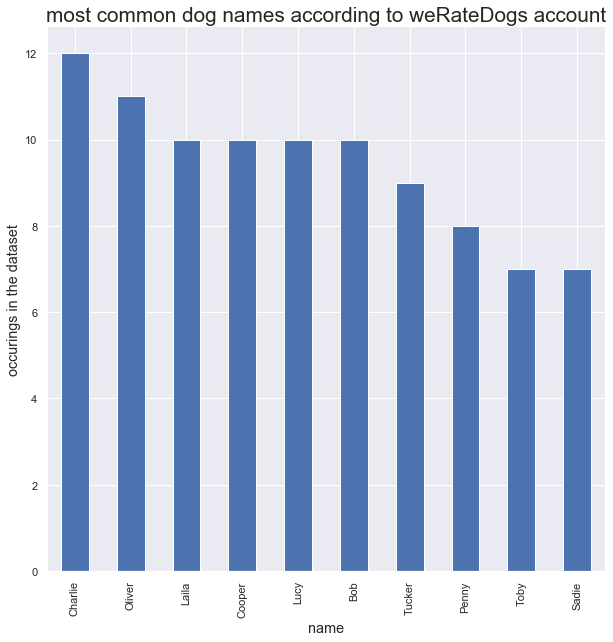

In [153]:
#barplot of the 10 most common names in the dataset
plt.figure()
master_df.query('name != "No Name"').name.value_counts().head(10).plot.bar(figsize = (10, 10))
plt.title('most common dog names according to weRateDogs account', fontsize = 'xx-large')
plt.xlabel('name', fontsize = 'large')
plt.ylabel('occurings in the dataset', fontsize = 'large')
sns.despine();

**most used dog names in the data-set :**
<ol>
    <li>Charlie (12)</li>
    <li>Oliver (11)</li>
    <li>Laila, Cooper, Lucy, Bob (10)</li>
</ol>

### Ratings

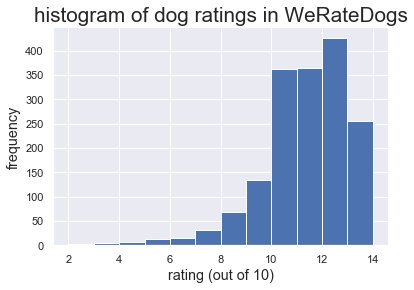

In [157]:
#histogram of the overall_rating
plt.figure()
master_df.overall_rating.hist(bins = 12)
sns.despine()
plt.xlabel('rating (out of 10)', fontsize = 'large')
plt.ylabel('frequency', fontsize = 'large')
plt.title('histogram of dog ratings in WeRateDogs', fontsize = 'xx-large');

**insights :** the graph is so skewed to the left with a peak on 12/10  
This was expected since the users tend to rate the dogs more than 10 (coz it's fun :D)  
let's limit the results to start from 9

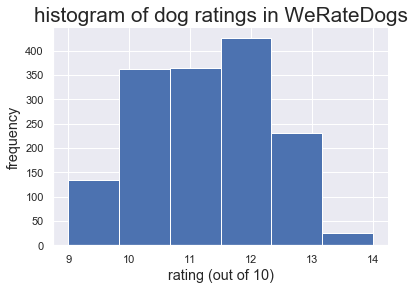

In [159]:
#histogram of the overall_rating > 8
plt.figure()
master_df.query('overall_rating > 8').overall_rating.hist(bins = 6)
sns.despine()
plt.xlabel('rating (out of 10)', fontsize = 'large')
plt.ylabel('frequency', fontsize = 'large')
plt.title('histogram of dog ratings in WeRateDogs', fontsize = 'xx-large');

**so the most common rating is 12  
let's calculate the mean rating**

In [161]:
#mean rating
master_df.overall_rating.describe()

count    1684.000000
mean     10.847981  
std      1.754899   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: overall_rating, dtype: float64

**the average rating is 10.85 and the median is 11  
Now, I'll look at the relation between rating and other variables**

### Breed

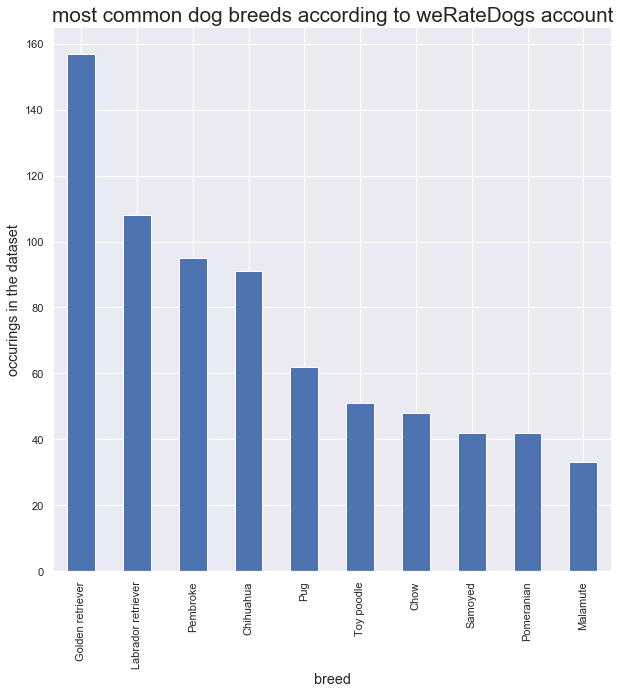

In [162]:
#most common breeds
plt.figure()
master_df.breed.value_counts().head(10).plot.bar(figsize = (10, 10))
plt.title('most common dog breeds according to weRateDogs account', fontsize = 'xx-large')
plt.xlabel('breed', fontsize = 'large')
plt.ylabel('occurings in the dataset', fontsize = 'large')
sns.despine();

**most common dog breeds in the data-set :**  
<ol>
    <li>Golden retriever</li>
    <li>Labrador retriever</li>
    <li>Pembroke</li>
</ol>

Exciting ! now time to see the highest and lowest rated dog breed

In [168]:
#using groupby to see highest and lowest rated dog on average breeds
master_df.groupby('breed').mean()['overall_rating'].sort_values()

breed
Japanese spaniel               5.000000 
Soft-coated wheaten terrier    8.800000 
Walker hound                   9.000000 
Scotch terrier                 9.000000 
Tibetan terrier                9.250000 
Dalmatian                      9.333333 
Boston bull                    9.416667 
Welsh springer spaniel         9.500000 
Dandie dinmont                 9.571429 
Miniature schnauzer            9.600000 
Norwich terrier                9.600000 
Afghan hound                   9.666667 
Redbone                        9.666667 
Maltese dog                    9.736842 
Rhodesian ridgeback            9.750000 
Scottish deerhound             9.750000 
Airedale                       9.833333 
Saint bernard                  9.857143 
Mexican hairless               9.857143 
Newfoundland                   9.857143 
Miniature poodle               9.875000 
English setter                 9.875000 
Miniature pinscher             10.000000
Irish terrier                  10.000000
Ibizan hou

In [170]:
#count of Bouvier des flandres dogs
master_df.query('breed == "Bouvier des flandres"').shape[0]

1

In [178]:
#counts of all breeds
#using groupby to see highest and lowest rated dog on average breeds
master_df.groupby('breed', observed = True).count()['tweet_id'].sort_values()

breed
Clumber                        1  
Japanese spaniel               1  
Irish wolfhound                1  
Silky terrier                  1  
Standard schnauzer             1  
Bouvier des flandres           1  
Entlebucher                    1  
Scotch terrier                 1  
Wire-haired fox terrier        2  
Appenzeller                    2  
Australian terrier             2  
Groenendael                    2  
Black-and-tan coonhound        2  
Sussex spaniel                 2  
Cairn                          3  
Leonberg                       3  
Greater swiss mountain dog     3  
Irish water spaniel            3  
Curly-coated retriever         3  
Briard                         3  
Afghan hound                   3  
Komondor                       3  
Toy terrier                    3  
Brabancon griffon              3  
Welsh springer spaniel         4  
Weimaraner                     4  
Irish setter                   4  
Tibetan terrier                4  
Gordon setter 

In [179]:
#calculate lowest and highest rating for breeds only occured more than mean occurance frequence
#calculate the mean
master_df.groupby('breed', observed = True).count()['tweet_id'].mean()

14.902654867256636

In [181]:
#require occurencies starting from 15 and repeat the first step (for highr confidence)
master_df.groupby('breed').agg({'tweet_id' : np.size, 'overall_rating' : np.mean}).query('tweet_id >= 15')['overall_rating'].sort_values()

breed
Soft-coated wheaten terrier       8.800000 
Maltese dog                       9.736842 
Miniature pinscher                10.000000
Italian greyhound                 10.000000
Beagle                            10.150000
West highland white terrier       10.187500
Pug                               10.241935
Shih-tzu                          10.350000
Lakeland terrier                  10.444444
Shetland sheepdog                 10.526316
Chihuahua                         10.549451
Basset                            10.705882
Staffordshire bullterrier         10.761905
Kuvasz                            10.777778
Chesapeake bay retriever          10.838710
Malamute                          10.878788
Pomeranian                        10.928571
American staffordshire terrier    11.000000
German shepherd                   11.000000
Toy poodle                        11.039216
Old english sheepdog              11.066667
Rottweiler                        11.105263
Cardigan                  

**highest rated breeds are Samoyed, Golden retriever and Great pyrenees  
lowest rated breed is Soft-coated wheaten terrier**

### relation between type keywords and rating

In [182]:
#doggo average rating
master_df.query('doggo')['overall_rating'].mean()

12.961995249406176

In [183]:
#floofer average rating
master_df.query('floofer')['overall_rating'].mean()

12.995249406175772

In [184]:
#pupper average rating
master_df.query('pupper')['overall_rating'].mean()

12.895486935866984

In [185]:
#puppo average rating
master_df.query('puppo')['overall_rating'].mean()

12.986935866983373

**no insights here, values are so close**
> I kept those 4 variables to try expecting the rating using them in a linear model but from those results I feel like this model is not going to be good enough  
I'll keep them anyways for now

### the effect of the rating on likes and retweets

In [203]:
#scatterplot function
def scatter(df, x, y, xlabel, ylabel, title) :
    plt.figure(figsize = (8, 8))
    sns.swarmplot(df[x], df[y])
    #df.plot(x, y, kind = 'scatter', figsize = (8, 8), alpha = 0.5)
    plt.xlabel(xlabel, fontsize = 'large')
    plt.ylabel(ylabel, fontsize = 'large')
    plt.title(title, fontsize = 'xx-large')

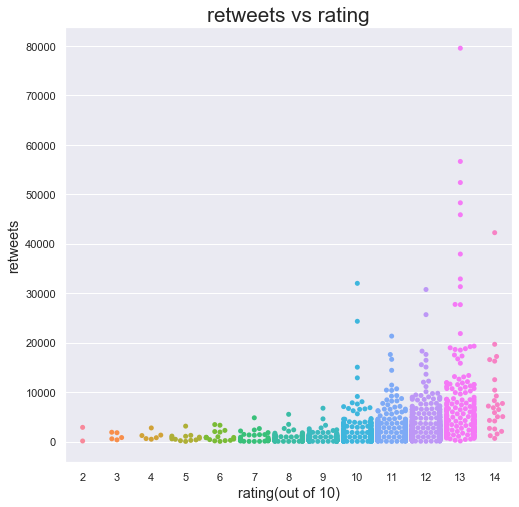

In [204]:
#relation between retweets and rating
scatter(master_df, 'overall_rating', 'rt_count', 'rating(out of 10)', 'retweets', 'retweets vs rating')

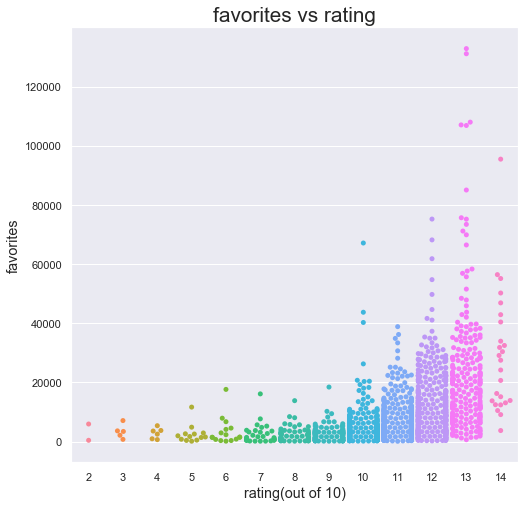

In [205]:
#relation between favorites and rating
scatter(master_df, 'overall_rating', 'fav_count', 'rating(out of 10)', 'favorites', 'favorites vs rating')

**and yes, looks like the higher the rating is, the more retweets and favorites it grabs**

### insights
<ul>
    <li>most common dog names in the data-set :  
        <ol>
            <li>Charlie (12)</li>
            <li>Oliver (11)</li>
            <li>Laila, Cooper, Lucy, Bob (10)</li>
        </ol>
    </li>
    <li>the most common rating is 12 </li>
    <li>the average rating is 10.85 and the median is 11</li>
    <li>most common dog breeds in the data-set :  
        <ol>
            <li>Golden retriever</li>
            <li>Labrador retriever</li>
            <li>Pembroke</li>
        </ol>
    </li>
    <li>highest rated breeds are Samoyed, Golden retriever and Great pyrenees<br>
        lowest rated breed is Soft-coated wheaten terrier
    </li>
    <li>the higher the rating is, the more retweets and favorites it grabs</li>
</ul>

> **future plan : build a linear model to predict dog rating based on retweets, favorites and/or type keywords**